In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mbl
from scipy import stats
%matplotlib inline

from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option("display.max_rows", 101)

In [3]:
statcast_2016 = pd.read_csv("/Users/orah82/baseball_cap/data_2016.csv")
statcast_2018 = pd.read_csv("/Users/orah82/baseball_cap/data_2018.csv")
statcast_2017 = pd.read_csv("/Users/orah82/baseball_cap/data_2017.csv")

In [4]:
frames = [statcast_2016, statcast_2017, statcast_2018]

In [5]:
big_data = pd.concat(frames)

In [6]:
big_data.head()

,Unnamed: 0,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,0,13,FC,2016-09-29,89.9,-1.3285,6.2611,Alex Colome,570560.0,517008.0,field_out,hit_into_play,NaN,NaN,NaN,NaN,8.0,Carlos Sanchez flies out to center fielder Kev...,R,L,R,CWS,TB,X,8.0,fly_ball,1.0,1.0,2016.0,-0.212108,0.581267,-0.246,1.835,NaN,605183.0,NaN,2.0,9.0,Bot,104.05,62.39,NaN,NaN,435064.0,NaN,160929_230112,3.346,-130.907,-4.982,-0.997,35.076,-27.621,3.23,1.53,381.0,106.0,17.0,88.625,2119.0,6.331,449252.0,517008.0,435064.0,543543.0,523253.0,446334.0,493351.0,572816.0,595281.0,543484.0,54.1707,0.668,0.826,0.0,1.0,0.0,0.0,5.0,76.0,3.0,Cutter,3.0,5.0,3.0,5.0,5.0,3.0,3.0,5.0,Standard,Standard
1,1,15,FC,2016-09-29,90.0,-1.0754,6.3885,Alex Colome,570560.0,517008.0,NaN,called_strike,NaN,NaN,NaN,NaN,11.0,NaN,R,L,R,CWS,TB,S,NaN,NaN,1.0,0.0,2016.0,-0.159225,0.727467,-0.907,2.735,NaN,605183.0,NaN,2.0,9.0,Bot,NaN,NaN,NaN,NaN,435064.0,NaN,160929_230048,1.020,-131.072,-3.572,-0.351,35.252,-25.880,3.19,1.53,NaN,NaN,NaN,88.776,1976.0,6.380,449252.0,517008.0,435064.0,543543.0,523253.0,446334.0,493351.0,572816.0,595281.0,543484.0,54.1217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,2.0,Cutter,3.0,5.0,3.0,5.0,5.0,3.0,3.0,5.0,Standard,Standard
2,2,19,FC,2016-09-29,90.8,-1.1806,6.3923,Alex Colome,570560.0,517008.0,NaN,blocked_ball,NaN,NaN,NaN,NaN,13.0,NaN,R,L,R,CWS,TB,B,NaN,NaN,0.0,0.0,2016.0,-0.021450,0.819200,-0.222,0.808,NaN,605183.0,NaN,2.0,9.0,Bot,NaN,NaN,NaN,NaN,435064.0,NaN,160929_230021,2.474,-132.019,-8.600,1.362,29.798,-24.532,3.25,1.55,NaN,NaN,NaN,90.461,2181.0,6.475,449252.0,517008.0,435064.0,543543.0,523253.0,446334.0,493351.0,572816.0,595281.0,543484.0,54.0267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,1.0,Cutter,3.0,5.0,3.0,5.0,5.0,3.0,3.0,5.0,Standard,Standard
3,3,22,FF,2016-09-29,95.7,-1.1880,6.4365,Alex Colome,488671.0,517008.0,strikeout,swinging_strike,NaN,NaN,NaN,NaN,4.0,Alex Avila strikes out swinging.,R,L,R,CWS,TB,S,2.0,NaN,2.0,2.0,2016.0,-0.579508,1.335200,-0.569,2.265,NaN,605183.0,NaN,1.0,9.0,Bot,NaN,NaN,NaN,NaN,435064.0,NaN,160929_225941,3.020,-139.104,-7.055,-6.286,33.051,-16.685,3.40,1.60,NaN,NaN,NaN,94.905,2091.0,6.294,449252.0,517008.0,435064.0,543543.0,523253.0,446334.0,493351.0,572816.0,595281.0,543484.0,54.2074,NaN,NaN,0.0,1.0,0.0,0.0,NaN,75.0,5.0,4-Seam Fastball,3.0,5.0,3.0,5.0,5.0,3.0,3.0,5.0,Infield shift,Standard
4,4,24,FC,2016-09-29,89.1,-1.2936,6.3917,Alex Colome,488671.0,517008.0,NaN,ball,NaN,NaN,NaN,NaN,13.0,NaN,R,L,R,CWS,TB,B,NaN,NaN,1.0,2.0,2016.0,0.259667,0.575533,-1.008,2.015,NaN,605183.0,NaN,1.0,9.0,Bot,NaN,NaN,NaN,NaN,435064.0,NaN,160929_225914,0.231,-129.720,-4.865,4.751,27.830,-27.650,3.25,1.60,NaN,NaN,NaN,88.492,2141.0,6.172,449252.0,517008.0,435064.0,543543.0,523253.0,446334.0,493351.0,572816.0,595281.0,543484.0,54.3301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,4.0,Cutter,3.0,5.0,3.0,5.0,5.0,3.0,3.0,5.0,Infield shift,Standard


In [7]:
big_data.drop(columns="Unnamed: 0", inplace=True)
big_data.set_index("index", inplace=True)

In [8]:
features = ['plate_x','plate_z', 'ax','ay','effective_speed','release_speed', 'release_pos_x', 'release_pos_z', 'release_spin_rate', 'pfx_x', 'pfx_z', 'launch_speed_angle']



In [9]:
big_beta = big_data[features]

In [10]:
big_beta.dropna(how='any', axis=0, inplace=True)

/Users/orah82/anaconda3/envs/DSI/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
# big_beta= big_beta.replace(['single','walk','double','home_run',
#                                 'hit_by_pitch', 'sac_fly', 'sac_bunt','triple','run','sac_bunt_double_play'],0)

In [12]:
# big_beta= big_beta.replace(['intent_walk','pickoff_1b','sac_fly_double_play','field_error','catcher_interf','pickoff_2b',
#                                      "pickoff_caught_stealing_3b","pickoff_caught_stealing_2b"], 1)

In [13]:
# big_beta = big_beta.replace(['caught_stealing_home','fielders_choice','double_play','field_out', "strikeout", 'force_out',
#                              'grounded_into_double_play','fielders_choice_out',
#                              'strikeout_double_play','other_out','sac_fly_double_play',
#                              'pickoff_caught_stealing_home','batter_interference',
#                              'caught_stealing_2b','triple_play','caught_stealing_3b'],2)

In [14]:
X = big_beta.drop(columns='launch_speed_angle')

In [15]:
y= big_beta['launch_speed_angle']

In [16]:
y = to_categorical(y)

In [17]:
X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                   random_state=77)

In [18]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [19]:
model = Sequential()

model.add(Dense(64, # number of neurons, hyperparameter
                activation='relu', # always use relu
                input_shape=(X_train.shape[1],))) # number of features: 6

model.add(Dense(32, # number of neurons, hyperparameter
                activation='relu', # always use relu
                input_shape=(X_train.shape[1],))) # number of features: 6

model.add(Dense(16, # number of neurons, hyperparameter
                activation='relu', # always use relu
                input_shape=(X_train.shape[1],))) # number of features: 6


model.add(Dense(y.shape[1], # 3 neurons, one neuron per class
                activation='softmax'))

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
history= model.fit(X_train_sc, y_train,
          epochs=30,
          batch_size=512,
          validation_data=(X_test_sc, y_test))

Train on 114918 samples, validate on 38307 samples
Epoch 1/30
114918/114918 [==============================] - 1s 5us/sample - loss: 1.5675 - accuracy: 0.3659 - val_loss: 1.4867 - val_accuracy: 0.3934
Epoch 2/30
114918/114918 [==============================] - 0s 3us/sample - loss: 1.4779 - accuracy: 0.3941 - val_loss: 1.4738 - val_accuracy: 0.3908
Epoch 3/30
114918/114918 [==============================] - 0s 3us/sample - loss: 1.4666 - accuracy: 0.3949 - val_loss: 1.4643 - val_accuracy: 0.3936
Epoch 4/30
114918/114918 [==============================] - 0s 3us/sample - loss: 1.4608 - accuracy: 0.3954 - val_loss: 1.4608 - val_accuracy: 0.3944
Epoch 5/30
114918/114918 [==============================] - 0s 3us/sample - loss: 1.4583 - accuracy: 0.3966 - val_loss: 1.4588 - val_accuracy: 0.3948
Epoch 6/30
114918/114918 [==============================] - 0s 3us/sample - loss: 1.4570 - accuracy: 0.3960 - val_loss: 1.4594 - val_accuracy: 0.3945
Epoch 7/30
114918/114918 [=======================

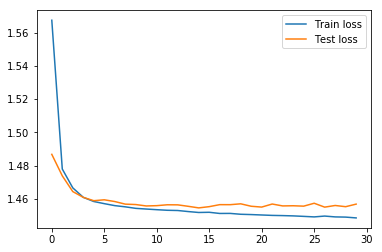

In [22]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();